In [7]:
import numpy as np
import matplotlib.pyplot as plt

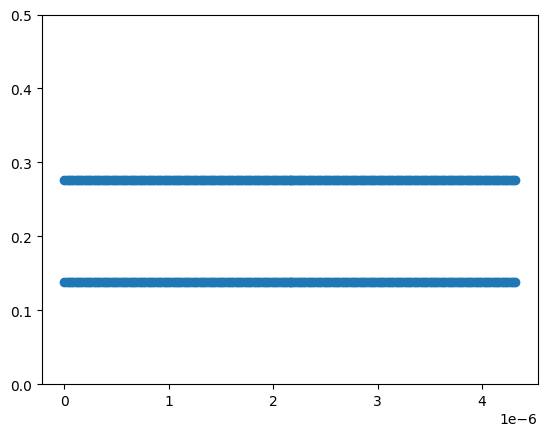

In [8]:
band_folder = "standard_cell_pbc/kronig_penney/length_9.96nm/bulkek.dat"
bands = np.loadtxt(band_folder)
plt.plot(bands[:, 0], bands[:, 1], 'o')
plt.ylim(0,0.5)
plt.show()

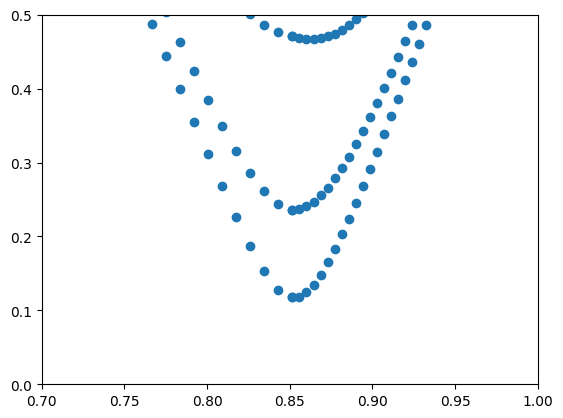

In [16]:
band_folder = "non_standard_cell_pbc/length_10nm/bulkek_fullBZ.dat"
bands = np.loadtxt(band_folder)
plt.plot(bands[:, 0], bands[:, 1], 'o')
plt.ylim(0, 0.5)
plt.xlim(0.7,1)
plt.show()

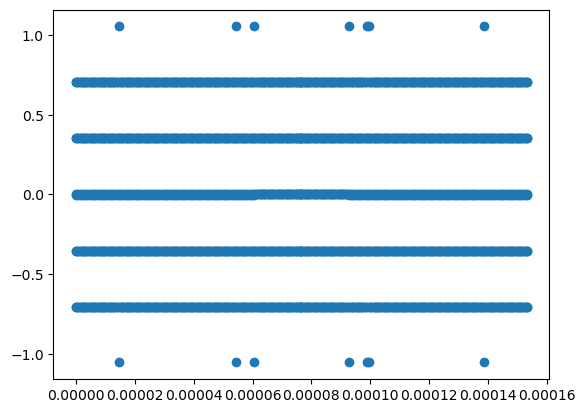

In [9]:
band_folder = "non_standard_cell_pbc/length_10nm/potential_0/bulkek.dat"
bands = np.loadtxt(band_folder)
plt.plot(bands[:, 0], bands[:, 1], 'o')
# plt.ylim(0.1,0.14)
plt.show()

In [22]:
a1 = np.array([102.2602844238, 0, 0])
a2 = np.array([0, 2.4599997997, 0])
a3 = np.array([0, 0, 10])

b1_cartesian = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
b2_cartesian = 2 * np.pi * np.cross(a3, a1) / np.dot(a2, np.cross(a3, a1))
b3_cartesian = 2 * np.pi * np.cross(a1, a2) / np.dot(a3, np.cross(a1, a2))


# bzb_fractional_x = np.array([np.pi / np.linalg.norm(b1), 0, 0])

# bzb_cartesian_x = bzb_fractional_x[0] * b1 + bzb_fractional_x[1] * b2 + bzb_fractional_x[2] * b3

# print("Brillouin zone boundary along the x-direction (fractional coordinates):", bzb_fractional_x)
# print("Brillouin zone boundary along the x-direction (Cartesian coordinates):", bzb_cartesian_x)


In [24]:
volume = np.dot(b1_cartesian, np.cross(b2_cartesian, b3_cartesian))

b1_fractional = np.array([np.dot(b1_cartesian, np.cross(b2_cartesian, b3_cartesian)),
                          np.dot(b2_cartesian, np.cross(b3_cartesian, b1_cartesian)),
                          np.dot(b3_cartesian, np.cross(b1_cartesian, b2_cartesian))]) / volume
b2_fractional = np.array([np.dot(b1_cartesian, np.cross(b2_cartesian, b3_cartesian)),
                          np.dot(b2_cartesian, np.cross(b3_cartesian, b1_cartesian)),
                          np.dot(b3_cartesian, np.cross(b1_cartesian, b2_cartesian))]) / volume
b3_fractional = np.array([np.dot(b1_cartesian, np.cross(b2_cartesian, b3_cartesian)),
                          np.dot(b2_cartesian, np.cross(b3_cartesian, b1_cartesian)),
                          np.dot(b3_cartesian, np.cross(b1_cartesian, b2_cartesian))]) / volume

print("Reciprocal lattice vectors in fractional coordinates:")
print("b1_fractional:", b1_fractional)
print("b2_fractional:", b2_fractional)
print("b3_fractional:", b3_fractional)

Reciprocal lattice vectors in fractional coordinates:
b1_fractional: [1. 1. 1.]
b2_fractional: [1. 1. 1.]
b3_fractional: [1. 1. 1.]


In [27]:
given_vector_cartesian = np.array([-0.06, 0.012, 0.])
given_vector_fractional = np.array([np.dot(given_vector_cartesian, np.cross(b2_cartesian, b3_cartesian)),
                                    np.dot(b1_cartesian, np.cross(given_vector_cartesian, b3_cartesian)),
                                    np.dot(b1_cartesian, np.cross(b2_cartesian, given_vector_cartesian))]) / volume

print("Fractional coordinates of the given reciprocal lattice vector:")
print(given_vector_fractional)

Fractional coordinates of the given reciprocal lattice vector:
[-0.97651378  0.00469825  0.        ]


In [29]:
import numpy as np

# Original lattice vectors for the unit cell
original_lattice_vectors = np.array([
    [2.130422, -6.150000, 0.000000],
    [4.260845, 4.920000, 0.000000],
    [0.000000, 0.000000, 26.720000]
])

# Transformed lattice vectors for the unit cell
transformed_lattice_vectors = np.array([
    [4.2608451843, 0.0000000000, 0.0000000000],
    [0.0000000000, 2.4599997997, 0.0000000000],
    [0.0000000000, 0.0000000000, 10.0000000000]
])

# Inverse of the original lattice vectors matrix
inverse_original_lattice_vectors = np.linalg.inv(original_lattice_vectors)

# Transformation matrix
transformation_matrix = np.dot(transformed_lattice_vectors, inverse_original_lattice_vectors)

# High symmetry points in fractional coordinates
high_symmetry_points_frac = np.array([
    [0.00000, 0.00000, 0.00000],
    [0.33333, 0.33333, 0.00000],
    [0.00000, 0.50000, 0.00000]
])

# Calculate transformed coordinates of high symmetry points
high_symmetry_points_transformed = np.dot(high_symmetry_points_frac, transformation_matrix.T)

# Display transformed coordinates
print("Transformed Coordinates of High Symmetry Points:")
for i, point in enumerate(high_symmetry_points_transformed):
    print(f"Point {i+1}: ({point[0]:.6f}, {point[1]:.6f}, {point[2]:.6f})")


Transformed Coordinates of High Symmetry Points:
Point 1: (0.000000, 0.000000, 0.000000)
Point 2: (0.428567, -0.047619, 0.000000)
Point 3: (0.357143, 0.071429, 0.000000)


In [ ]:
import numpy as np
from ase import Atoms
from ase.geometry import cell_to_cellpar, cellpar_to_cell
from ase.build import make_supercell

# Define original unit cell lattice vectors
original_cell = np.array([
    [2.130422, -6.150000, 0.000000],
    [4.260845, 4.920000, 0.000000],
    [0.000000, 0.000000, 26.720000]
])

# Define transformation matrix
transformed_cell = np.array([
    [4.2608451843, 0.0000000000, 0.0000000000],
    [0.0000000000, 2.4599997997, 0.0000000000],
    [0.0000000000, 0.0000000000, 10.0000000000]
])

# Create ASE Atoms object for original unit cell
atoms_original = Atoms(symbols='X', cell=original_cell)

atoms_transformed = Atoms(symbols='X', cell=transformed_cell)

high_symmetry_points_original = np.array([
    [0.0, 0.0, 0.0],
    [0.33333, 0.33333, 0.33333],
    [0.0, 0.5, 0.0],
])

# Map high symmetry points to transformed unit cell
high_symmetry_points_transformed = np.dot(high_symmetry_points_original, np.linalg.inv(transformation_matrix))

print("High symmetry points in the transformed unit cell:")
print(high_symmetry_points_transformed)


In [4]:
import numpy as np
from ase import Atoms
from ase.cell import Cell

# Define original unit cell lattice vectors
original_cell = np.array([
    [2.130422, -6.150000, 0.000000],
    [4.260845, 4.920000, 0.000000],
    [0.000000, 0.000000, 26.720000]
])

# Define transformed unit cell lattice vectors
transformed_cell = np.array([
    [4.2608451843, 0.0000000000, 0.0000000000],
    [0.0000000000, 2.4599997997, 0.0000000000],
    [0.0000000000, 0.0000000000, 10.0000000000]
])

# Create ASE Cell object for original unit cell
cell_original = Cell(original_cell)

# Create ASE Cell object for transformed unit cell
cell_transformed = Cell(transformed_cell)

# Define high symmetry points in the original unit cell
high_symmetry_points_original = np.array([
    [0.0, 0.0, 0.0],
    [0.33333, 0.33333, 0.00000],
    [0.0, 0.5, 0.0],
])

# Map high symmetry points to transformed unit cell
high_symmetry_points_transformed = cell_original.cartesian_positions(high_symmetry_points_original)

# Convert mapped positions to fractional coordinates in the transformed cell
high_symmetry_points_transformed_fractional = cell_transformed.scaled_positions(high_symmetry_points_transformed)

print("High symmetry points in the transformed unit cell:")
print(high_symmetry_points_transformed_fractional)


High symmetry points in the transformed unit cell:
[[ 0.          0.          0.        ]
 [ 0.49999494 -0.16666501  0.        ]
 [ 0.49999998  1.00000008  0.        ]]


In [13]:
import numpy as np
from ase import cell

# Define transformed unit cell lattice vectors
transformed_cell = np.array([
    [4.2608451843, 0.0000000000, 0.0000000000],
    [0.0000000000, 2.4599997997, 0.0000000000],
    [0.0000000000, 0.0000000000, 10.0000000000]
])

# Create ASE cell object for transformed unit cell
transformed_cell_ase = cell.Cell(transformed_cell)

# Define high symmetry points in the original unit cell
high_symmetry_points_original = {
    'G': [0.0, 0.0, 0.0],
    'K':[0.33333, 0.33333, 0.00000],
    'M':[0.0, 0.5, 0.0],
}

# Get the high symmetry points in the transformed cell using bandpath
high_symmetry_points_transformed = transformed_cell_ase.bandpath(high_symmetry_points_original)

print("High symmetry points in the transformed unit cell:")
print(high_symmetry_points_transformed)


KeyError: 'No kpoint "K" among "GRSTUXYZ"'

In [11]:
Cell.bandpath(transformed_cell,pbc=[1,1,0])

AttributeError: 'numpy.ndarray' object has no attribute 'uncomplete'

Using ase, I want to be able to get the band path corresponding to the coordinates [-0.06,0.0,0.0] to [0.06,0.0,0.0] in angstrom inverse and another band path corresponding to [-0.06,0.012,0.0] to [0.06,0.012,0.0] in angstrom inverse.